#### 🚦 Road Traffic Accident Analysis (Exploratory Data Analysis)

Road traffic accidents remain a major public safety concern, leading to loss of lives, injuries, and economic impact. Understanding the patterns and contributing factors behind these accidents is essential for developing effective prevention strategies.

In this project, I perform an Exploratory Data Analysis (EDA) on road traffic accident data from **Addis Ababa City**. The goal is to uncover trends related to accident severity, driver demographics, vehicle characteristics, and causes of accidents. By analyzing this data, we aim to generate insights that can support data-driven decisions for improving road safety and reducing accident-related risks.

This project demonstrates an end-to-end data analysis workflow, including data cleaning, visualization, and interpretation of findings using **Python, Pandas, Matplotlib, and Seaborn**.

#### Understanding the data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Improve plot appearance
plt.rcParams['figure.figsize'] = (10, 6)

#Load dataset
df = pd.read_csv('Addis_Ababa_city_RTA.csv')

# Preview dataset
df.head()

,Time,Day_of_week,Age_band_of_driver,Drivers_gender,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Casualty_gender,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,2,Going straight,Driver or rider,Male,31-50,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,2,Going straight,Pedestrian,Female,18-30,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [22]:
# Check the shape of the dataset to understand the number of roews and colums
df.shape

(13063, 31)

##### Dataset has 13,063 rows and 31 columns

In [23]:
#Check the columns information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13063 entries, 0 to 13062
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         13063 non-null  object
 1   Day_of_week                  13063 non-null  object
 2   Age_band_of_driver           13063 non-null  object
 3   Drivers_gender               13063 non-null  object
 4   Educational_level            12297 non-null  object
 5   Vehicle_driver_relation      12464 non-null  object
 6   Driving_experience           12187 non-null  object
 7   Type_of_vehicle              12096 non-null  object
 8   Owner_of_vehicle             12555 non-null  object
 9   Service_year_of_vehicle      9073 non-null   object
 10  Defect_of_vehicle            8496 non-null   object
 11  Area_accident_occured        12823 non-null  object
 12  Lanes_or_Medians             12586 non-null  object
 13  Road_allignment              12

In [24]:
# Checking how many missing values in the dataset
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Drivers_gender                    0
Educational_level               766
Vehicle_driver_relation         599
Driving_experience              876
Type_of_vehicle                 967
Owner_of_vehicle                508
Service_year_of_vehicle        3990
Defect_of_vehicle              4567
Area_accident_occured           240
Lanes_or_Medians                477
Road_allignment                 144
Types_of_Junction                 0
Road_surface_type                 0
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Casualty_gender                   0
Age_band_of_casualty              0
Work_of_casuality              3382
Fitness_of_casuality        

The dataset contains a mix of complete columns and columns with significant missing data like 30% of data

In [25]:
# duplicate value check
df.duplicated().sum()

np.int64(0)

##### Data Cleaning

In [26]:
# Convert day of the week column to categorical type, so python does not treat it as a string.
# First define the logical order of the week
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Then convert the 'Day_of_Week' column to a categorical type with the specified order
df['Day_of_week'] = pd.Categorical(df['Day_of_week'], categories=day_order, ordered=True)

# Verify the conversion
df['Day_of_week'].dtype

CategoricalDtype(categories=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
                  'Friday', 'Saturday'],
, ordered=True, categories_dtype=object)

In [27]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Drivers_gender,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Number_of_casualties,Vehicle_movement,Casualty_class,Casualty_gender,Age_band_of_casualty,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,2,Going straight,Driver or rider,Male,31-50,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,2,Going straight,Pedestrian,Female,18-30,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,2,Going straight,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


#### Data Analysis

Accident severity Analysis - Count the frequency of each accident severity category.

In [28]:
df['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10776
Serious Injury     1976
Fatal injury        311
Name: count, dtype: int64

##### Visualizing Accident Severity Distribution with a Themed Pie Chart

This visualization shows the proportion of accident severity levels using a pie chart styled with road-themed colors, making it easier to interpret severity at a glance.

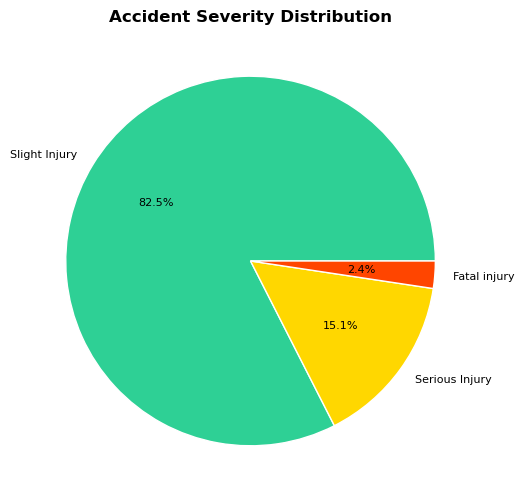

In [29]:
# 1. Get the counts from the dataframe and rename as counts
counts = df['Accident_severity'].value_counts()

# 2. Define road-related colors(Turquoise, Caution Yellow, Traffic Red
# Order: Slight, Serious, Fatal which matching the index of your value_counts)
road_colors = ["#2ED095", '#FFD700', '#FF4500']

# 3. Plot the pie chart using matplotlib
plt.pie(counts,
        labels=counts.index,
        autopct='%1.1f%%',
        colors=road_colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'color': 'black', 'weight': 'light', 'fontsize': 8})

plt.title('Accident Severity Distribution', fontsize=12, weight='bold')
plt.show()

##### Key Insights: Accident Severity Distribution

##### Accident Distribution by Day of the Week
This analysis shows how road accidents are distributed across different days of the week. Understanding how daily accident patterns helps identify high-risk days and supports better traffic safety planning

In [30]:
# Count the frequency of accidents for each day of the week
df['Day_of_week'].value_counts()

Day_of_week
Friday       2150
Thursday     1967
Wednesday    1945
Tuesday      1878
Monday       1782
Saturday     1777
Sunday       1564
Name: count, dtype: int64

##### Accidents by Day of the Week

This visualization shows the distribution of road accidents across different days of the week. The days are ordered by the count of accident frequency to clearly highlight which days record the highest number of incidents using a column chart

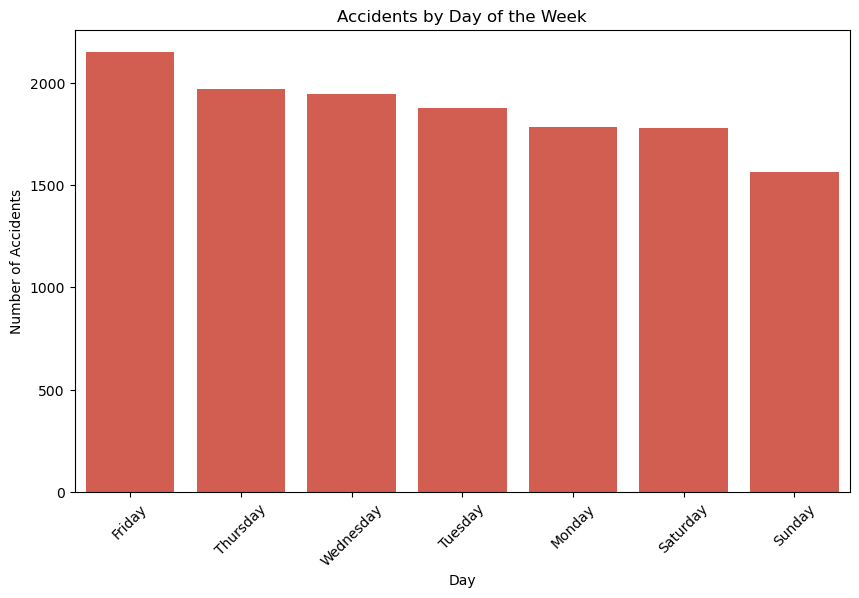

In [31]:
# Plot a count of accidents for each day of the week
sns.countplot(
    data=df,
    x='Day_of_week',
    order=df['Day_of_week'].value_counts().index,  # Order days by frequency
    color='#e74c3c' ) # Red tone to emphasize accident severity
plt.title("Accidents by Day of the Week")       # Add title and axis labels
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)    # Rotate x-axis labels for better readability
plt.show()

##### Accident Heatmap: Day of Week vs. Hour of Day

This analysis examines how road accident frequency changes across different days of the week and hours of the day. Accident time data was converted to datetime format, and the hour component was extracted for detailed analysis. A cross-tabulation of day and hour was used to count accident occurrences, with days arranged chronologically for better interpretation.

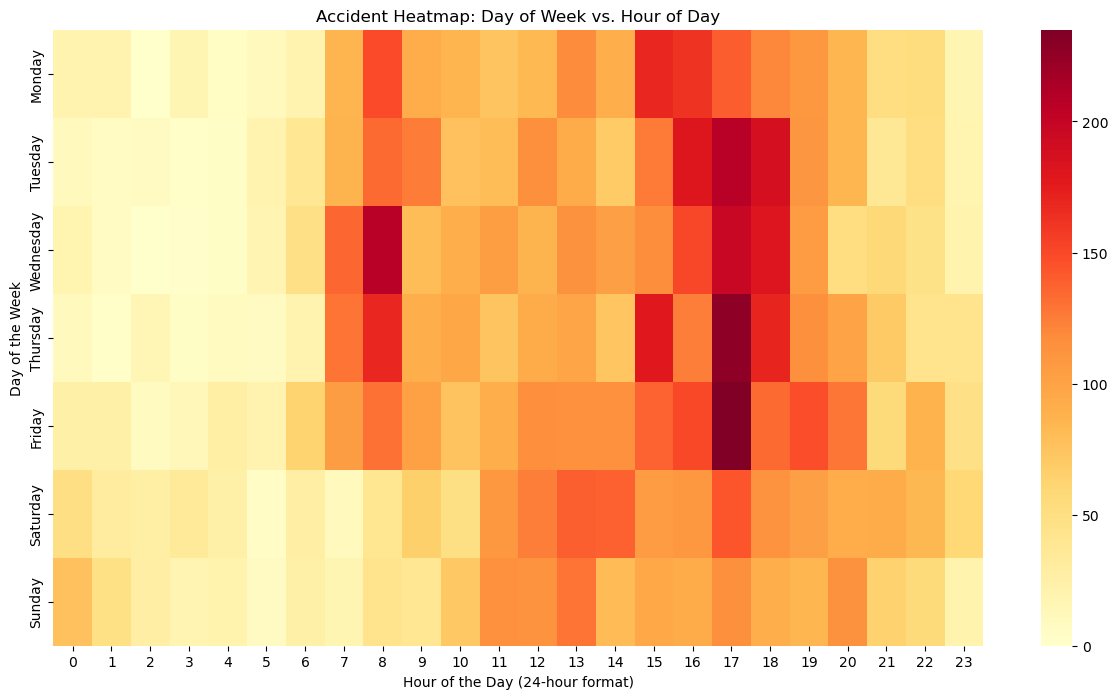

In [32]:
# Convert the Time column to datetime format (HH:MM:SS)
# Invalid or malformed time values are converted to NaT
df['Time'] = pd.to_datetime(
    df['Time'],
    format='%H:%M:%S',
    errors='coerce')
df['Hour'] = df['Time'].dt.hour    # Extract the hour (0–23) from the datetime column

# 2. Use crosstab for frequency analysis (best for counts)
# This automatically counts how many accidents occurred for each Day/Hour combo
pivot_table = pd.crosstab(df['Day_of_week'], df['Hour'])

# 3. Ensuring the days are in correct chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Reindex only existing days to avoid empty/blank rows in the table
pivot_table = pivot_table.reindex(day_order)

# 4. Plot the Heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='YlOrRd',              #Yellow to Red color scale
             annot=False)                             # Turn off cell annotations for cleaner visualization
plt.title("Accident Heatmap: Day of Week vs. Hour of Day")    #Add plot title and axis label
plt.xlabel("Hour of the Day (24-hour format)")
plt.ylabel("Day of the Week")
plt.savefig('accident_heatmap.png')
plt.show()



The heatmap applies a color gradient to emphasize periods with higher accident concentration. Overall, it clearly identifies peak accident times and provides actionable insights to support traffic planning and improve road safety management.

In [33]:
# Count the number of accidents involving each driver gender

df['Drivers_gender'].value_counts()   # Returns frequency of each gender category

Drivers_gender
Male      12104
Female      959
Name: count, dtype: int64

##### Visualizing Accidents by Driver Gender

This chart visualizes the number of accidents by driver gender, providing a clear demographic perspective on accident involvement using a column chart.

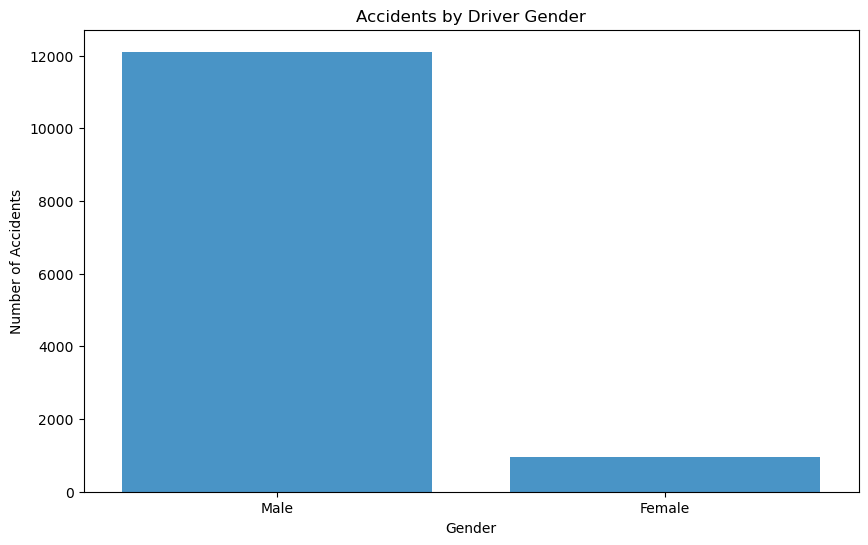

In [34]:
# Plot a count of accidents for each driver gender
sns.countplot(
    data=df,
    x='Drivers_gender',
    color='#3498db'  # Blue color for visualization
)

# Add title and axis labels
plt.title("Accidents by Driver Gender")
plt.xlabel('Gender')
plt.ylabel('Number of Accidents')

# Save the figure for reporting or portfolio
plt.savefig('accidents_by_gender.png')

# Display the plot
plt.show()


##### Demographic Analysis: Driver Age Bands

This analysis examines the distribution of accidents across different age groups of drivers. Understanding which age bands are more frequently involved in accidents, which can help target road safety campaigns effectively

In [35]:
# Count the number of accidents for each driver age band
df['Age_band_of_driver'].value_counts()   # Returns frequency of each age category

Age_band_of_driver
18-30       4561
31-50       4351
Over 51     1688
Unknown     1599
Under 18     864
Name: count, dtype: int64

##### Visualizing Accidents by Age Band of Driver

This chart visualizes the number of accidents across different driver age bands, making it easy to spot which age groups are more frequently involved in accidents

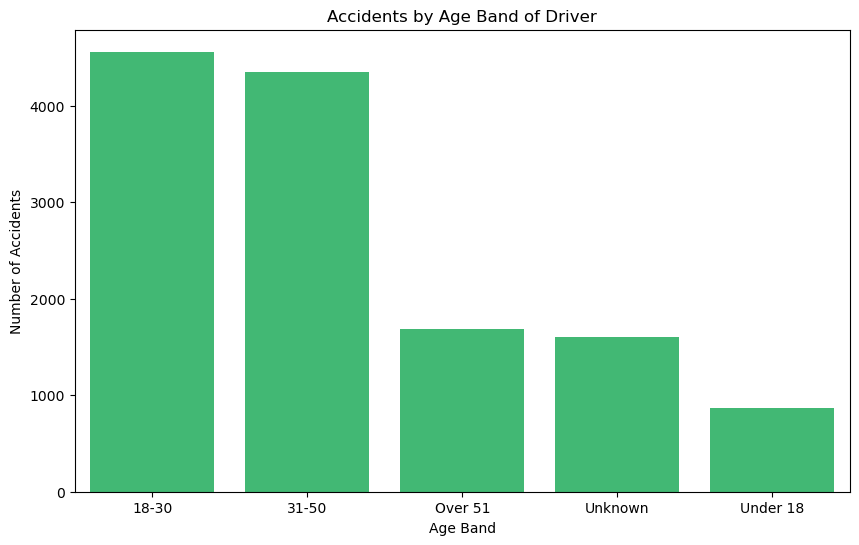

In [36]:
# Plot a count of accidents for each driver age band
sns.countplot(
    data=df,
    x='Age_band_of_driver',
    order=df['Age_band_of_driver'].value_counts().index,  # Order bars by frequency
    color='#2ecc71'  # Green color for visualization
)

# Add title and axis labels
plt.title("Accidents by Age Band of Driver")
plt.xlabel('Age Band')
plt.ylabel('Number of Accidents')

# Save the figure for reporting or portfolio
plt.savefig('accidents_by_age_band.png')

# Display the plot
plt.show()

##### Top Causes of Accidents

This analysis identifies the most frequent causes of accidents in the dataset. Understanding the primary causes helps inform road safety initiatives and prevention strategies

In [37]:
# Count the occurrences of each cause of accident and get the top 10
df['Cause_of_accident'].value_counts().head(10)  # Returns the 10 most common accident causes

Cause_of_accident
No distancing                           2374
Changing lane to the right              1890
Changing lane to the left               1561
Driving carelessly                      1489
No priority to vehicle                  1266
Moving Backward                         1192
No priority to pedestrian                766
Other                                    479
Overtaking                               475
Driving under the influence of drugs     357
Name: count, dtype: int64

##### Visualizing the Top 10 Causes of Road Accidents

This bar chart visualizes the 10 most frequent causes of accidents, making it easy to identify key risk factors on the road

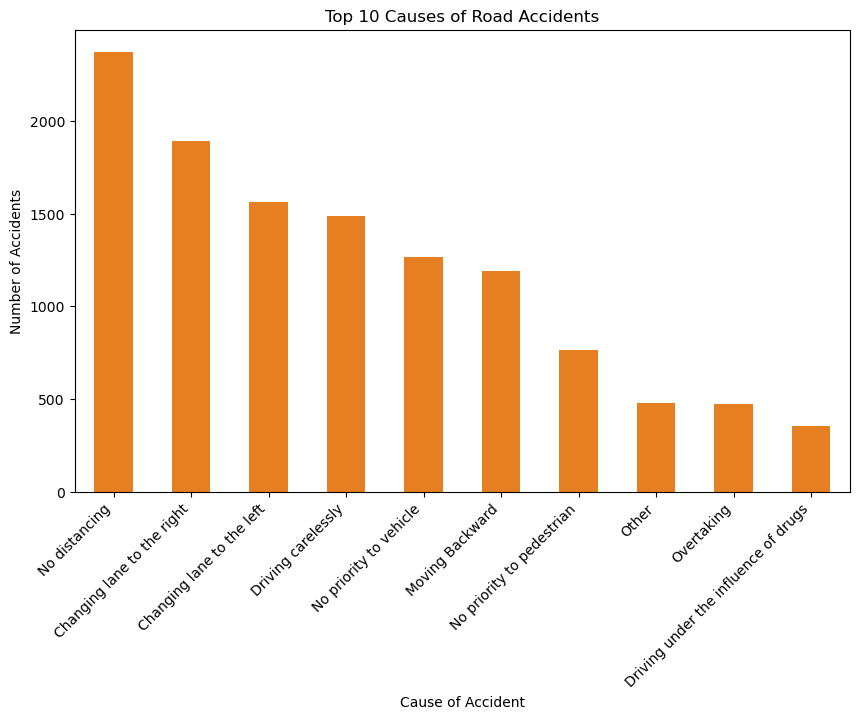

In [38]:
# Get the top 10 most common causes of accidents
top_causes = df['Cause_of_accident'].value_counts().head(10)

# Plot a bar chart for the top 10 causes
top_causes.plot(
    kind='bar',
    color='#e67e22'  # Orange color for visualization
)

# Add title and axis labels
plt.title("Top 10 Causes of Road Accidents")
plt.xlabel("Cause of Accident")
plt.ylabel("Number of Accidents")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the figure for reporting or portfolio
plt.savefig('top_10_causes_of_accidents.png')

# Display the plot
plt.show()


##### Distribution of Number of Casualties per Accident

This histogram visualizes the frequency distribution of casualties per accident, with a density curve (KDE) to understand trends and extremes

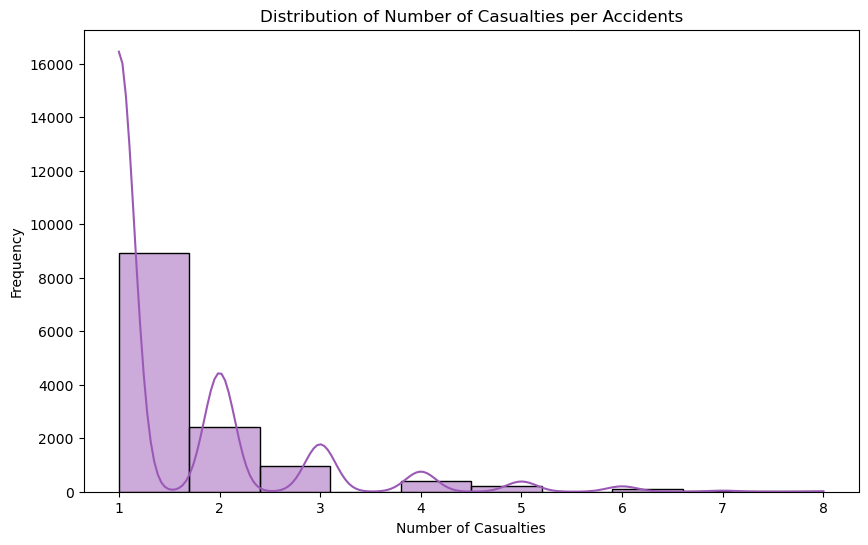

In [39]:
sns.histplot(df['Number_of_casualties'], bins=10, kde=True, color='#9b59b6')  # Plot histogram with KDE and purple color
plt.title("Distribution of Number of Casualties per Accidents")              # Set the plot title
plt.xlabel("Number of Casualties")                                           # Label the x-axis
plt.ylabel("Frequency")                                                      # Label the y-axis
plt.savefig('distribution_of_casualties.png')                                # Save the plot as a PNG file
plt.show()                                                                    # Display the plot